# Introduction
This notebook provides an analysis of the population growth simulation executed on the Ethereum blockchain.


In [1]:
import os
import requests
from dotenv import load_dotenv
import matplotlib.pyplot as plt

load_dotenv()
ETHERSCAN_API_KEY = os.getenv("ETHERSCAN_API_KEY")


## Population Growth Analysis
For the deployed contract of `PopulationGrowth`, the data is downloaded from the logs and visualized.

The logs are retrieved from https://sepolia.etherscan.io/tx/0x23c38ce613260b145ad53d7a6f43d96a22db7c7c23247249b071988074679768

In [2]:
transaction_hash = '0x23c38ce613260b145ad53d7a6f43d96a22db7c7c23247249b071988074679768'
topic0 = "0x2d147fa40ccd83a0aaf41448b5670bd2d035ff836bff542c6aa83af0113e04c2"



In [3]:
def get_logs(topic0):
   url = f"https://api-sepolia.etherscan.io/api?module=logs&action=getLogs&topic0={topic0}&apikey={ETHERSCAN_API_KEY}"
   headers = {
      'Content-Type': 'application/json',
      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)'
   }

   response = requests.get(url, headers=headers)
   if response.status_code == 200:
       data = response.json()
       if 'result' in data:
           return data['result']
       else:
           raise Exception(f"Logs not found in response: {data}")
   else:
       raise Exception(f"Error fetching logs: {response.status_code}")


In [4]:
logs = get_logs(topic0)
(logs)

[{'address': '0xc0c3f7d5e5cbfbe5484bb7d6fa5740390059d8cc',
  'topics': ['0x2d147fa40ccd83a0aaf41448b5670bd2d035ff836bff542c6aa83af0113e04c2'],
  'data': '0x0000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000041a',
  'blockNumber': '0x757d81',
  'blockHash': '0xf49618507781db6c3cd76e6558822ba8058f5d7a4455c5c19c5aded1fae915b7',
  'timeStamp': '0x67ae0ec0',
  'gasPrice': '0x5757b588',
  'gasUsed': '0x969c',
  'logIndex': '0xe8',
  'transactionHash': '0x23c38ce613260b145ad53d7a6f43d96a22db7c7c23247249b071988074679768',
  'transactionIndex': '0x96'},
 {'address': '0xc0c3f7d5e5cbfbe5484bb7d6fa5740390059d8cc',
  'topics': ['0x2d147fa40ccd83a0aaf41448b5670bd2d035ff836bff542c6aa83af0113e04c2'],
  'data': '0x0000000000000000000000000000000000000000000000000000000000000002000000000000000000000000000000000000000000000000000000000000044e',
  'blockNumber': '0x757d81',
  'blockHash': '0xf49618507781db6c3cd76e6558822ba8058f5d7a4

In [5]:
data = []
for entry in logs:
    if entry['transactionHash'] != transaction_hash:
        # use only the transaction in question
        continue

    emmited_data = entry['data']
    emmited_data = emmited_data[2:]  # remove 0x prefix
    # the first half is the year and the second half is the population
    len_emmited_data = len(emmited_data)
    year = int(emmited_data[:len_emmited_data // 2], 16)
    population = int(emmited_data[len_emmited_data // 2:], 16)
    data.append((year, population))


In [6]:
data

[(1, 1050),
 (2, 1102),
 (3, 1157),
 (4, 1214),
 (5, 1274),
 (6, 1337),
 (7, 1403),
 (8, 1473),
 (9, 1546),
 (10, 1623)]

Text(0.5, 1.0, 'Population growth simulation results for 0x23c38ce613260b145ad53d7a6f43d96a22db7c7c23247249b071988074679768 ')

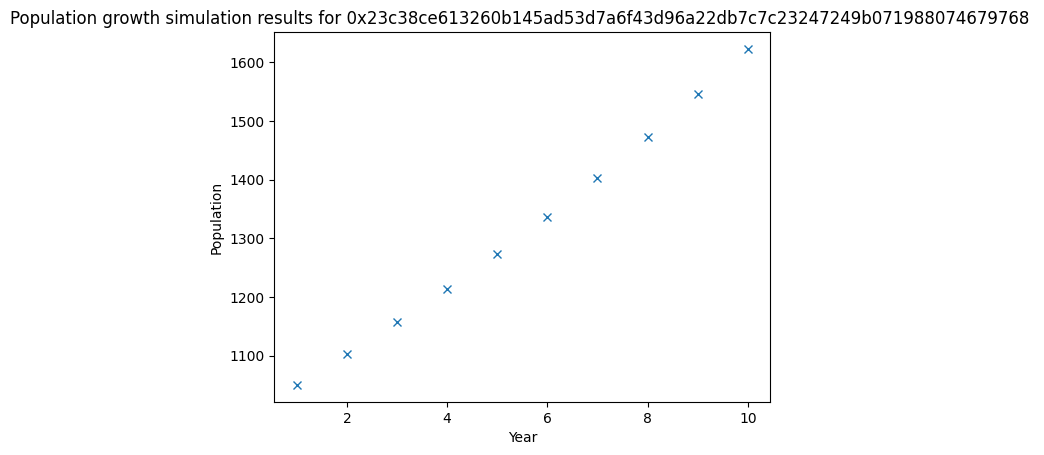

In [13]:
# Visualize the year vs population
years, populations = zip(*data)
plt.plot(years, populations, 'x')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title(f'Population growth simulation results for {transaction_hash} ')